In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython import display
from ipywidgets import interact, widgets
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
wh_gdgi = pd.read_csv('wh_gd_gi_final.csv')

# <span style="color:red">Observation: Switzerland has both the Max World Happiness Score (7.587) and the Min Gender Inequality Score (.04)</span>

#### Question: What are the max scores and their respective countries for each category?

In [3]:
print('Max Happiness Score:',round(wh_gdgi['Happiness Score'].max(), 3))
print('Max Happiness Countries:')
print(wh_gdgi[['Country', 'Region']].loc[wh_gdgi['Happiness Score'] == wh_gdgi['Happiness Score'].max()])

Max Happiness Score: 7.587
Max Happiness Countries:
         Country          Region
117  Switzerland  Western Europe


In [4]:
print('Max Gender Development Score:',wh_gdgi['GD 2015'].max())
print('Max GD 2015 Countries:')
print(wh_gdgi[['Country', 'Region']].loc[wh_gdgi['GD 2015'] == wh_gdgi['GD 2015'].max()])

Max Gender Development Score: 1.032
Max GD 2015 Countries:
      Country                      Region
37    Estonia  Central and Eastern Europe
70  Lithuania  Central and Eastern Europe


In [5]:
print('Max Gender Inequality Score:',wh_gdgi['GI 2015'].max())
print('Max GI 2015 Countries:')
print(wh_gdgi[['Country', 'Region']].loc[wh_gdgi['GI 2015'] == wh_gdgi['GI 2015'].max()])

Max Gender Inequality Score: 0.767
Max GI 2015 Countries:
    Country                           Region
135   Yemen  Middle East and Northern Africa


#### Question: What are the min scores and their respective countries for each category?

In [6]:
print('Min Happiness Score:',round(wh_gdgi['Happiness Score'].min(), 3))
print('Min Happiness Countries:')
print(wh_gdgi[['Country', 'Region']].loc[wh_gdgi['Happiness Score'] == wh_gdgi['Happiness Score'].min()])

Min Happiness Score: 2.839
Min Happiness Countries:
    Country              Region
122    Togo  Sub-Saharan Africa


In [7]:
print('Min Gender Development Score:',wh_gdgi['GD 2015'].min())
print('Min GD 2015 Countries: \n')
print(wh_gdgi[['Country','Region']].loc[wh_gdgi['GD 2015'] == wh_gdgi['GD 2015'].min()])

Min Gender Development Score: 0.609
Min GD 2015 Countries: 

       Country         Region
0  Afghanistan  Southern Asia


In [8]:
print('Min Gender Inequality Score:',wh_gdgi['GI 2015'].min())
print('Min GI 2015 Countries:')
print(wh_gdgi[['Country', 'Region']].loc[wh_gdgi['GI 2015'] == wh_gdgi['GI 2015'].min()])

Min Gender Inequality Score: 0.04
Min GI 2015 Countries:
         Country          Region
117  Switzerland  Western Europe


# <span style="color:red">Observation: Happiness Score has more of a normal distribution, while Gender Development has a left-skewed distribution which means more countries score higher Gender Development Scores. Gender Inequality has a slight right skewed distribution which means slightly more countries have a lower Gender Inequality Score</span>

### Question: What's the score distribution of each category

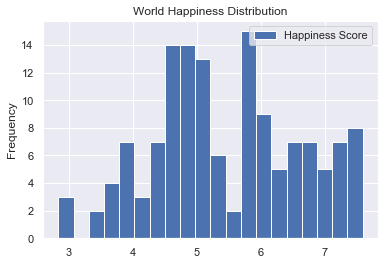

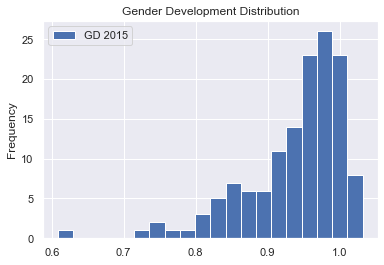

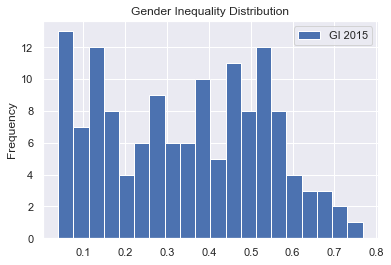

In [9]:
wh_gdgi[['Happiness Score']].plot(kind='hist', bins=20, title='World Happiness Distribution')
wh_gdgi[['GD 2015']].plot(kind='hist', bins=20, title='Gender Development Distribution')
wh_gdgi[['GI 2015']].plot(kind='hist', bins=20, title='Gender Inequality Distribution')

# <span style="color:red">Observation 1: Although a Western Europe country holds the highest World Happiness Score, Australia and New Zealand region have the highest Happiness Scores on average</span>

# <span style="color:red">Observation 2: Southern Asia and Sub-Saharan Africa have the lowest average World Happiness and Gender Development Scores, as well as the highest average Gender Inequality Scores</span>

# <span style="color:red">Observation 3: Western Countries dominate on average when it comes to World Happiness, as well as having lower Gender Inequality on average</span>

#### Question: What are the average scores by region?

In [100]:
def score_by_region(score):
    print(wh_gdgi[['Region',score]].groupby('Region').mean().sort_values(score, ascending=False))

def graph_by_region(score):
    wh_gdgi[['Region',score]].groupby('Region').mean().sort_values(score).plot(kind='barh')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

                                 Happiness Score
Region                                          
Australia and New Zealand               7.285000
North America                           7.273000
Western Europe                          6.739350
Latin America and Caribbean             6.204550
Middle East and Northern Africa         5.512722
Eastern Asia                            5.496250
Southeastern Asia                       5.397143
Central and Eastern Europe              5.315481
Southern Asia                           4.580857
Sub-Saharan Africa                      4.218032


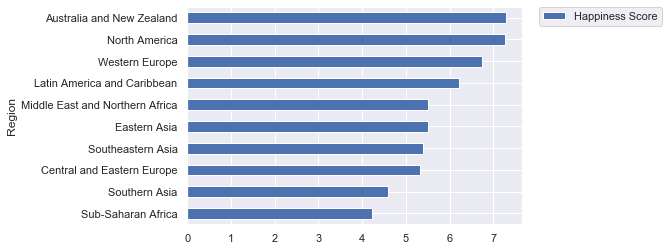

In [101]:
score_by_region('Happiness Score')
graph_by_region('Happiness Score')

                                  GD 2015
Region                                   
North America                    0.988000
Central and Eastern Europe       0.984593
Latin America and Caribbean      0.976650
Western Europe                   0.970700
Australia and New Zealand        0.970500
Eastern Asia                     0.969750
Southeastern Asia                0.962714
Middle East and Northern Africa  0.896667
Sub-Saharan Africa               0.883613
Southern Asia                    0.836429


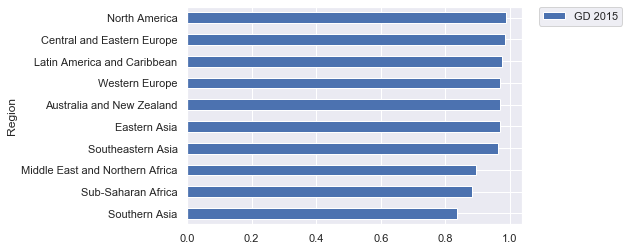

In [95]:
score_by_region('GD 2015')
graph_by_region('GD 2015')

                                  GI 2015
Region                                   
Sub-Saharan Africa               0.560065
Southern Asia                    0.517571
Latin America and Caribbean      0.406750
Middle East and Northern Africa  0.383556
Southeastern Asia                0.374429
Central and Eastern Europe       0.219963
Eastern Asia                     0.156250
North America                    0.150500
Australia and New Zealand        0.139000
Western Europe                   0.084700


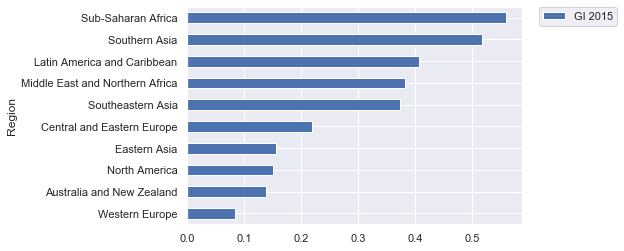

In [96]:
score_by_region('GI 2015')
graph_by_region('GI 2015')

In [97]:
def show_world(column):
    
    if column == "GI 2015":
        color = 'RdYlBu_r'
    else:
        color = 'RdYlBu'

    world = gpd.read_file('wh_gd_gi.shp')
    ax = world.dropna().plot(column=column, cmap = color, figsize=(15,9),scheme='quantiles', k=3, legend =True)
    ax.set_title(column, fontdict= {'fontsize':25})
    ax.set_axis_off()
    ax.get_legend().set_bbox_to_anchor((.12,.12))

In [53]:
interact(show_world, column=widgets.ToggleButtons(
        options=[('Happiness Score','Happiness'), ('Gender Development','GD 2015'), ('Gender Inequality', 'GI 2015')],
        description='Indicator:',
        disabled=False,
        button_style='',
        tooltips=['Happiness Score by Country', 'Gender Development by Country', 'Gender Inequality by Country']
        ))

interactive(children=(ToggleButtons(description='Indicator:', options=(('Happiness Score', 'Happiness'), ('Gen…

<function __main__.show_world(column)>